In [ ]:
Open and merge into a NetCDF file the Fractional Snow Cover (GFSC) downloaded from Theia

In [1]:
# Import libraries
import xarray as xr
import rioxarray as rxr
import os
import zipfile
import matplotlib.pyplot as plt
from pyproj import CRS

In [2]:
# Functions

def unzip(path: str) -> None:
    """
    Unzip files
    """
    for z in os.listdir(path):
        if z.endswith('.zip'):
            zip_name = path + "/" + z
            zip_ref = zipfile.ZipFile(zip_name)
            zip_ref.extractall(path)
            zip_ref.close()

In [7]:
# Cut image over a selected area if requested by the user
roi = input("Do you want to select a Region of Interest (if yes, type 'y'): ")

if roi == 'y':
    lat_min = float(input("Please insert the minimum latitude (in decimal degrees): "))
    lat_max = float(input("Please insert the maximum latitude (in decimal degrees): "))
    lon_min = float(input("Please insert the minimum longitude (in decimal degrees): "))
    lon_max = float(input("Please insert the maximum longitude (in decimal degrees): "))

Do you want to select a Region of Interest (if yes, type 'y'):  y
Please insert the minimum latitude (in decimal degrees):  46
Please insert the maximum latitude (in decimal degrees):  46.5
Please insert the minimum longitude (in decimal degrees):  5
Please insert the maximum longitude (in decimal degrees):  6.5


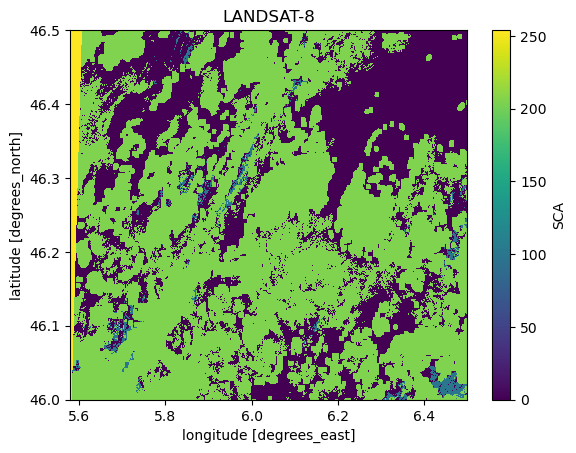

Saving lANDSAT-8 SCA map as 'Theia_LANDSAT-8_SCA.nc'


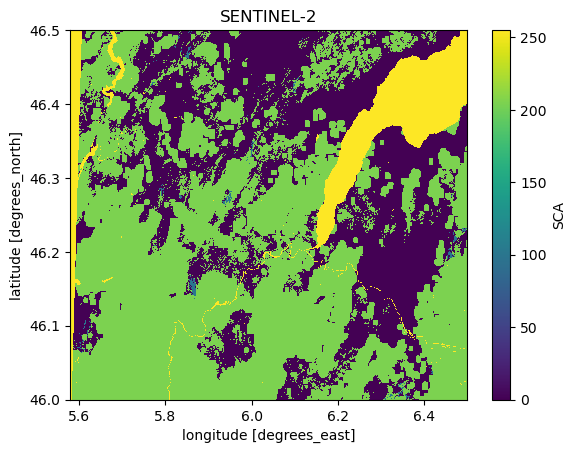

Saving Sentinel-2 SCA map as 'Theia_SENTINEL-2_SCA.nc'


In [8]:
# Unzip Theia downloaded SCA products
var = 'SCA'
zip_path = '/home/federico/Jupyter_Notebooks/Theia_SCA_sample/' 
unzip(zip_path)

# Create NetCDF from the downloaded SCA products, transform coordinates in the World Geodetic System (WGS-84; EPSG:4326), plot and save
folder_lst = os.listdir(zip_path)

for image in folder_lst:
    if os.path.isdir(f"{zip_path}/{image}"):
        if ('LANDSAT' in image) and (len(f"{zip_path}/{image}") > 0):
            da = rxr.open_rasterio(f"{zip_path}/{image}/{image}_SNW_XS.tif")
            sat_type = 'LANDSAT-8'
            ds_landsat = xr.Dataset()
            ds_landsat['SCA'] = da
            ds_landsat = ds_landsat.rio.reproject(CRS("WGS84"), nodata=254)
            if roi == 'y':
                ds_landsat = ds_landsat.where((ds_landsat.x <= lon_max) & (ds_landsat.x >= lon_min) & 
                                              (ds_landsat.y <= lat_max) & (ds_landsat.y >= lat_min), drop=True)

            # Plot
            plt.figure()
            ds_landsat[var].plot()
            plt.title('LANDSAT-8')
            plt.show()

            # Save the final GFSC map
            save_name = 'Theia_LANDSAT-8_SCA.nc'
            netcdf_encoding = {var: {'dtype': 'uint8', 'zlib': True, 'complevel': 5} for var in ds_landsat.data_vars}
            print(f"Saving lANDSAT-8 SCA map as '{save_name}'")
            ds_landsat.to_netcdf(save_name, engine="netcdf4", encoding=netcdf_encoding)

        if ('SENTINEL' in image) and (len(f"{zip_path}/{image}") > 0):
            da = rxr.open_rasterio(f"{zip_path}/{image}/{image}_SNW_R2.tif")
            sat_type = 'SENTINEL-2'
            ds_sentinel = xr.Dataset()
            ds_sentinel['SCA'] = da
            ds_sentinel = ds_sentinel.rio.reproject(CRS("WGS84"), nodata=254)
            if roi == 'y':
                ds_sentinel = ds_sentinel.where((ds_sentinel.x <= lon_max) & (ds_sentinel.x >= lon_min) & 
                                                (ds_sentinel.y <= lat_max) & (ds_sentinel.y >= lat_min), drop=True)

            # Plot
            plt.figure()
            ds_sentinel[var].plot()
            plt.title('SENTINEL-2')
            plt.show()
            
            # Save the final GFSC map
            save_name = 'Theia_SENTINEL-2_SCA.nc'
            netcdf_encoding = {var: {'dtype': 'uint8', 'zlib': True, 'complevel': 5} for var in ds_sentinel.data_vars}
            print(f"Saving Sentinel-2 SCA map as '{save_name}'")
            ds_landsat.to_netcdf(save_name, engine="netcdf4", encoding=netcdf_encoding)
        
        else:
            pass